In [1]:
import pandas as pd

C:\Users\spran\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\spran\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\spran\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import numpy as np

In [3]:
movies = pd.read_csv('movies.csv', encoding = 'unicode_escape')

In [4]:
movies.shape

(9742, 3)

In [5]:
rating = pd.read_csv('ratings.csv', encoding = 'unicode_escape')

In [6]:
rating.shape

(100836, 4)

In [7]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
rating['userId'].nunique()

610

In [9]:
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [10]:
newrating = rating[['movieId', 'rating']]

In [11]:
movies.head()
movies['movieId'].nunique()
movies[movies['movieId']==1]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [12]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
newmovie = movies[['movieId', 'title']]

In [14]:
result = newmovie.merge(newrating, on='movieId', how='right')

In [15]:
result.head()

,movieId,title,rating
0,1,Toy Story (1995),4.0
1,3,Grumpier Old Men (1995),4.0
2,6,Heat (1995),4.0
3,47,Seven (a.k.a. Se7en) (1995),5.0
4,50,"Usual Suspects, The (1995)",5.0


In [16]:
result.set_index('movieId', inplace = True)

In [17]:
result.shape

(100836, 2)

In [18]:
newrating[newrating['movieId']==1]

,movieId,rating
0,1,4.0
516,1,4.0
874,1,4.5
1434,1,2.5
1667,1,4.5
...,...,...
97364,1,2.5
98479,1,4.0
98666,1,2.5
99497,1,3.0


In [19]:
result.head()

,title,rating
movieId,,
1,Toy Story (1995),4.0
3,Grumpier Old Men (1995),4.0
6,Heat (1995),4.0
47,Seven (a.k.a. Se7en) (1995),5.0
50,"Usual Suspects, The (1995)",5.0


In [20]:
result['title'].value_counts()

Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
                                   ... 
Sex, Drugs & Taxation (2013)          1
Extraordinary Tales (2015)            1
Tomorrow (2015)                       1
Embrace of the Serpent (2016)         1
31 (2016)                             1
Name: title, Length: 9719, dtype: int64

In [21]:
result[result['title'] == 'Matrix, The (1999)']

,title,rating
movieId,,
2571,"Matrix, The (1999)",5.0
2571,"Matrix, The (1999)",1.0
2571,"Matrix, The (1999)",0.5
2571,"Matrix, The (1999)",5.0
2571,"Matrix, The (1999)",4.0
...,...,...
2571,"Matrix, The (1999)",5.0
2571,"Matrix, The (1999)",5.0
2571,"Matrix, The (1999)",5.0


<Axes: xlabel='title'>

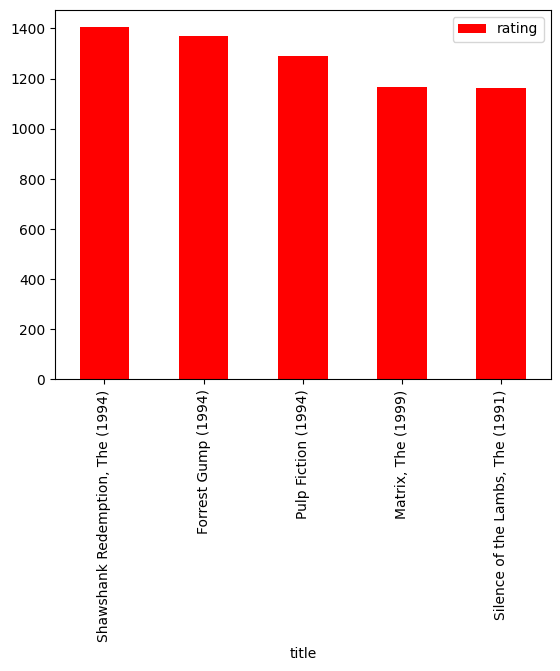

In [22]:
result.groupby('title').agg({'rating': sum}).sort_values(by = 'rating', ascending = False).head(5).plot(kind = 'bar', color = {'r'})

In [23]:
tags= pd.read_csv('tags.csv', encoding = 'unicode_escape')

In [24]:
tags.head()
tags.shape

(3683, 4)

In [25]:
newtags= tags[['userId', 'movieId', 'tag']]

In [26]:
tags[tags['movieId']== 2571]['tag']

815           martial arts
816                 sci-fi
1646    alternate universe
2794            philosophy
2795      post apocalyptic
Name: tag, dtype: object

In [27]:
result.head()

,title,rating
movieId,,
1,Toy Story (1995),4.0
3,Grumpier Old Men (1995),4.0
6,Heat (1995),4.0
47,Seven (a.k.a. Se7en) (1995),5.0
50,"Usual Suspects, The (1995)",5.0


In [28]:
result.shape

(100836, 2)

In [29]:
newresult = result.merge(newtags, on = 'movieId', how = 'right')

In [30]:
newresult.shape

(233234, 5)

In [31]:
newresult.head()

,movieId,title,rating,userId,tag
0,60756,Step Brothers (2008),5.0,2,funny
1,60756,Step Brothers (2008),3.0,2,funny
2,60756,Step Brothers (2008),3.5,2,funny
3,60756,Step Brothers (2008),2.5,2,funny
4,60756,Step Brothers (2008),4.5,2,funny


In [32]:
newresult['userId'] = newresult['userId'].astype('int')

In [33]:
movie_id = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
avg_rating = rating[rating['movieId'] == movie_id]['rating'].mean()

In [34]:
avg_rating

3.970982142857143

In [35]:
movie_id

589

In [36]:
newresult[newresult['movieId'] == 589]['rating'].mean()

3.970982142857143

<Axes: ylabel='Frequency'>

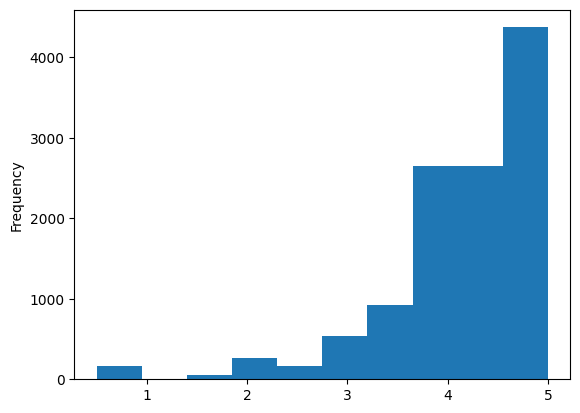

In [37]:
newresult[newresult['title']== 'Fight Club (1999)']['rating'].plot(kind = 'hist')

In [38]:
newresult[newresult['title']== 'Fight Club (1999)']

,movieId,title,rating,userId,tag
50970,2959,Fight Club (1999),5.0,424,dark comedy
50971,2959,Fight Club (1999),2.0,424,dark comedy
50972,2959,Fight Club (1999),0.5,424,dark comedy
50973,2959,Fight Club (1999),2.5,424,dark comedy
50974,2959,Fight Club (1999),3.5,424,dark comedy
...,...,...,...,...,...
232969,2959,Fight Club (1999),5.0,599,violent
232970,2959,Fight Club (1999),4.0,599,violent
232971,2959,Fight Club (1999),5.0,599,violent
232972,2959,Fight Club (1999),5.0,599,violent


In [39]:
import seaborn as sns

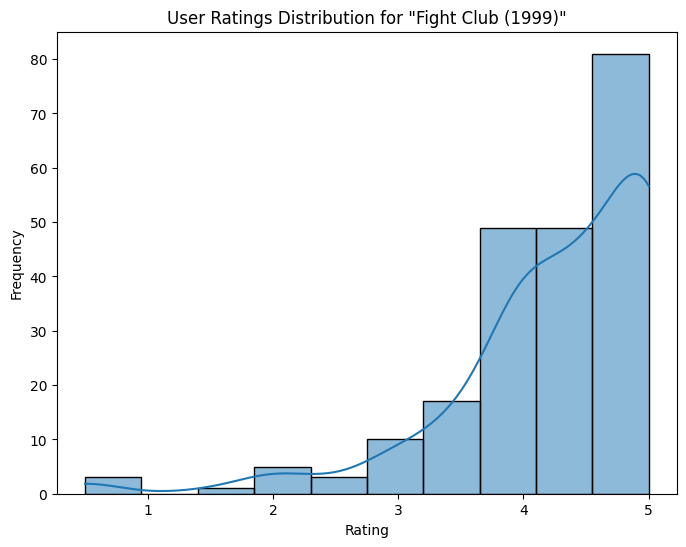

In [40]:
from matplotlib import pyplot as plt
fight_club_ratings = rating[rating['movieId'] == 2959]['rating']
plt.figure(figsize=(8, 6))
sns.histplot(fight_club_ratings, bins=10, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('User Ratings Distribution for "Fight Club (1999)"')
plt.show()

In [41]:
newresult.head()
ratings_m_c = rating.groupby('movieId')['rating'].agg(['mean', 'count']).sort_values(by='count', ascending=False)

In [42]:
ratings_m_c

,mean,count
movieId,,
356,4.164134,329
318,4.429022,317
296,4.197068,307
593,4.161290,279
2571,4.192446,278
...,...,...
4093,1.500000,1
4089,2.000000,1
58351,4.000000,1


In [43]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [44]:
ratings_above_50 = movies.merge(ratings_m_c, on = 'movieId', how = 'inner' )

In [45]:
ratings_above_50.head()

,movieId,title,genres,mean,count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49


In [46]:
ratings_above_50.rename({'mean': 'avg_rating', 'count' :'num_rating'}, axis = 1, inplace = True)

In [47]:
ratings_above_50.head()

,movieId,title,genres,avg_rating,num_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49


In [48]:
ratings_50 = ratings_above_50[ratings_above_50['num_rating']>50]

In [49]:
ratings_50.head()

,movieId,title,genres,avg_rating,num_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52
5,6,Heat (1995),Action|Crime|Thriller,3.946078,102
6,7,Sabrina (1995),Comedy|Romance,3.185185,54


In [50]:
ratings_50.groupby('title')['avg_rating'].mean().sort_values(ascending = False).head(5)

title
Shawshank Redemption, The (1994)                                               4.429022
Godfather, The (1972)                                                          4.289062
Fight Club (1999)                                                              4.272936
Cool Hand Luke (1967)                                                          4.271930
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)    4.268041
Name: avg_rating, dtype: float64

In [51]:
most_popular_movie = ratings_50[ratings_50['num_rating'] > 50].sort_values(by='avg_rating', ascending=False).head(5)

In [52]:
most_popular_movie

,movieId,title,genres,avg_rating,num_rating
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317
659,858,"Godfather, The (1972)",Crime|Drama,4.289062,192
2224,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.272936,218
974,1276,Cool Hand Luke (1967),Drama,4.271930,57
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,4.268041,97


In [53]:
ratings_50.sort_values(by='num_rating', ascending=False).head(5)

,movieId,title,genres,avg_rating,num_rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278


In [54]:
search = 'Sci-Fi'
ratings_50[ratings_50['genres'].str.contains(search, case=False)].sort_values(by = 'num_rating', ascending = False).head(5)

,movieId,title,genres,avg_rating,num_rating
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.750000,238
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.970982,224
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,4.215640,211


In [55]:
links = pd.read_csv('links.csv', encoding = 'unicode_escape')

In [56]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


# web scrapping

In [57]:
Imdb = ratings_50.merge(links, on = 'movieId', how = 'left')

In [58]:
Imdb.head()

,movieId,title,genres,avg_rating,num_rating,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,3.946078,102,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,3.185185,54,114319,11860.0


In [59]:
!pip install requests beautifulsoup4
import requests
from bs4 import BeautifulSoup

In [60]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating_span = soup.find('span', class_='ipc-rating-star--base')
    
    if imdb_rating_span:
        rating_text = imdb_rating_span.text.strip()  
        imdb_rating = rating_text.split(' ')[-1] 
        return imdb_rating
    else:
        return np.nan

In [61]:
Imdb['Imdb_ratings'] = Imdb['imdbId'].apply(scrapper)

In [63]:
Imdb['Imdb_ratings'].dtype

dtype('O')

In [67]:
Imdb['Imdb_ratings'] = Imdb['Imdb_ratings'].astype('float')

In [65]:
Imdb.head()

,movieId,title,genres,avg_rating,num_rating,imdbId,tmdbId,Imdb_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110,113497,8844.0,6.5
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52,113228,15602.0,7.0
3,6,Heat (1995),Action|Crime|Thriller,3.946078,102,113277,949.0,8.3
4,7,Sabrina (1995),Comedy|Romance,3.185185,54,114319,11860.0,7.6


In [68]:
Imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 435
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movieId       436 non-null    int64  
 1   title         436 non-null    object 
 2   genres        436 non-null    object 
 3   avg_rating    436 non-null    float64
 4   num_rating    436 non-null    int64  
 5   imdbId        436 non-null    int64  
 6   tmdbId        436 non-null    float64
 7   Imdb_ratings  436 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 30.7+ KB


In [72]:
Imdb.sort_values(by = 'Imdb_ratings', ascending = False)

,movieId,title,genres,avg_rating,num_rating,imdbId,tmdbId,Imdb_ratings
86,527,Schindler's List (1993),Drama|War,4.225000,220,108052,424.0,9.3
156,1221,"Godfather: Part II, The (1974)",Crime|Drama,4.259690,129,71562,240.0,9.2
146,1203,12 Angry Men (1957),Drama,4.149123,57,50083,389.0,9.0
139,1193,One Flew Over the Cuckoo's Nest (1975),Drama,4.203008,133,73486,510.0,9.0
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317,111161,278.0,9.0
...,...,...,...,...,...,...,...,...
323,4816,Zoolander (2001),Comedy,3.509259,54,196229,9398.0,4.7
60,353,"Crow, The (1994)",Action|Crime|Fantasy|Thriller,3.609375,64,109506,9495.0,4.6
116,788,"Nutty Professor, The (1996)",Comedy|Fantasy|Romance|Sci-Fi,2.731707,82,117218,9327.0,4.5
107,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,2.707547,53,117705,2300.0,4.5


In [81]:
word_search = 'Sci-FI'
Imdb[Imdb['genres'].str.contains(word_search, case = False)].sort_values(by = 'Imdb_ratings', ascending = False).head(5)

,movieId,title,genres,avg_rating,num_rating,imdbId,tmdbId,Imdb_ratings
248,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278,133093,603.0,8.8
433,109487,Interstellar (2014),Sci-Fi|IMAX,3.993151,73,816692,157336.0,8.8
393,48780,"Prestige, The (2006)",Drama|Mystery|Sci-Fi|Thriller,4.005556,90,482571,1124.0,8.8
424,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,4.066434,143,1375666,27205.0,8.7
44,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251,76759,11.0,8.7


In [83]:
Imdb.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 435
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movieId       436 non-null    int64  
 1   title         436 non-null    object 
 2   genres        436 non-null    object 
 3   avg_rating    436 non-null    float64
 4   num_rating    436 non-null    int64  
 5   imdbId        436 non-null    int64  
 6   tmdbId        436 non-null    float64
 7   Imdb_ratings  436 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 30.7+ KB
